## View reults

In [45]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from cosmic_dance.data_processor import *
from cosmic_dance.stack_plots import _get_date_marks

# Solar superstorm (G5)

#### Total satellites tracked per day during the event

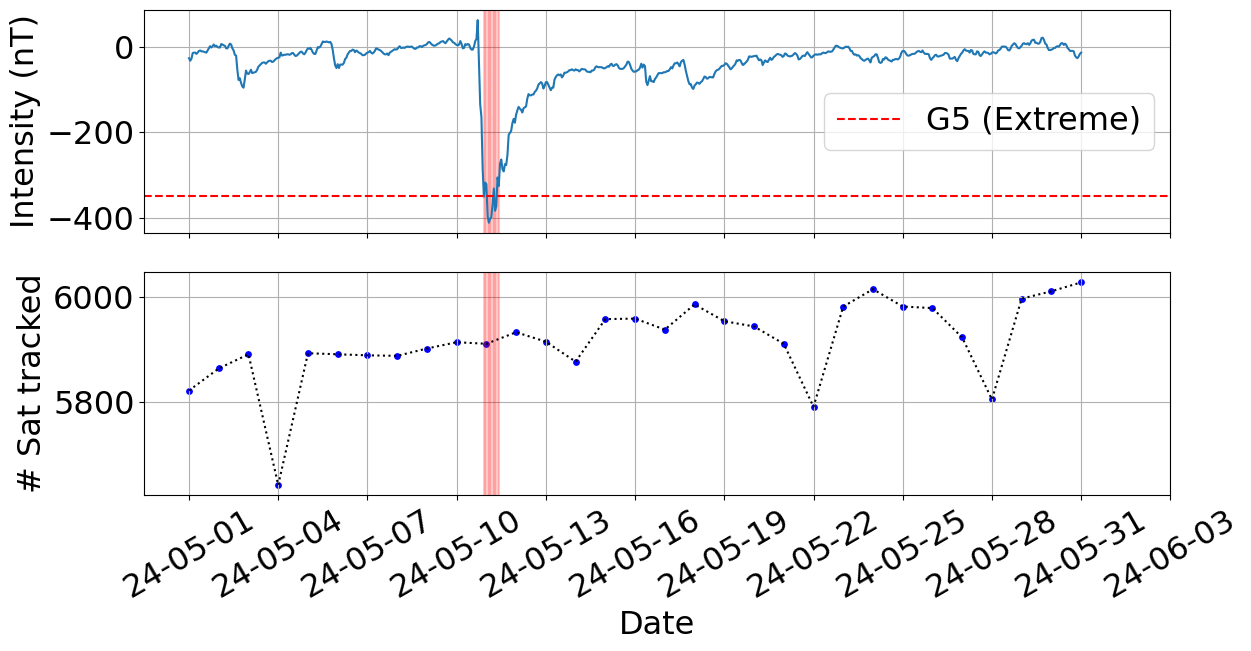

In [46]:
# Dataset
df = pd.read_csv(
    "/mnt/Storage/OUTPUTs/Starlink/OUTPUTs/tle_update/sat_tracked.csv")
df["DAY"] = pd.to_datetime(df["DAY"])

df_dst = read_dst_index_CSV("artifacts/DST/Dst_index.csv", abs_value=False)
df_dst = df_dst[df_dst["TIMESTAMP"].between(
    df.iloc[0]["DAY"], df.iloc[-1]["DAY"])]


# Params
plt.rcParams["figure.figsize"] = (13, 7)
plt.rcParams.update({'font.size': 23})


# Plotting
fig, axs = plt.subplots(2, 1, sharex=True)
for nt, t in zip(df_dst["nT"], df_dst["TIMESTAMP"]):
    if -300.0 >= nt:
        axs[0].axvline(x=t, color='r', linestyle='-', alpha=0.2)
        axs[1].axvline(x=t, color='r', linestyle='-', alpha=0.2)

axs[0].plot(df_dst["TIMESTAMP"], df_dst["nT"])
axs[0].axhline(
    y=-350.0,
    color='r',
    linestyle='--',
    label='G5 (Extreme)'
)

axs[1].scatter(
    df["DAY"], df["UNIQUE_SAT"],
    s=15,
    c='b'
)
axs[1].plot(
    df["DAY"], df["UNIQUE_SAT"],
    linestyle='dotted',
    c='black'
)


# Scaling and marking
axs[-1].set_xticks(
    _get_date_marks(
        df["DAY"].iloc[0],
        df["DAY"].iloc[-1],
        timedelta(days=3)
    ),
    minor=False
)
axs[-1].set_xticklabels(axs[-1].get_xticks(), rotation=30)
axs[-1].set_xlabel('Date')

axs[0].set_ylabel('Intensity (nT)')
axs[1].set_ylabel('# Sat tracked')

axs[0].grid()
axs[1].grid()

axs[0].legend()

# Viewing
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%y-%m-%d"))
plt.tight_layout()
plt.savefig("figures/G5/SatTrackPerDay.pdf")
plt.show()

#### Total TLE update per satellite during the event

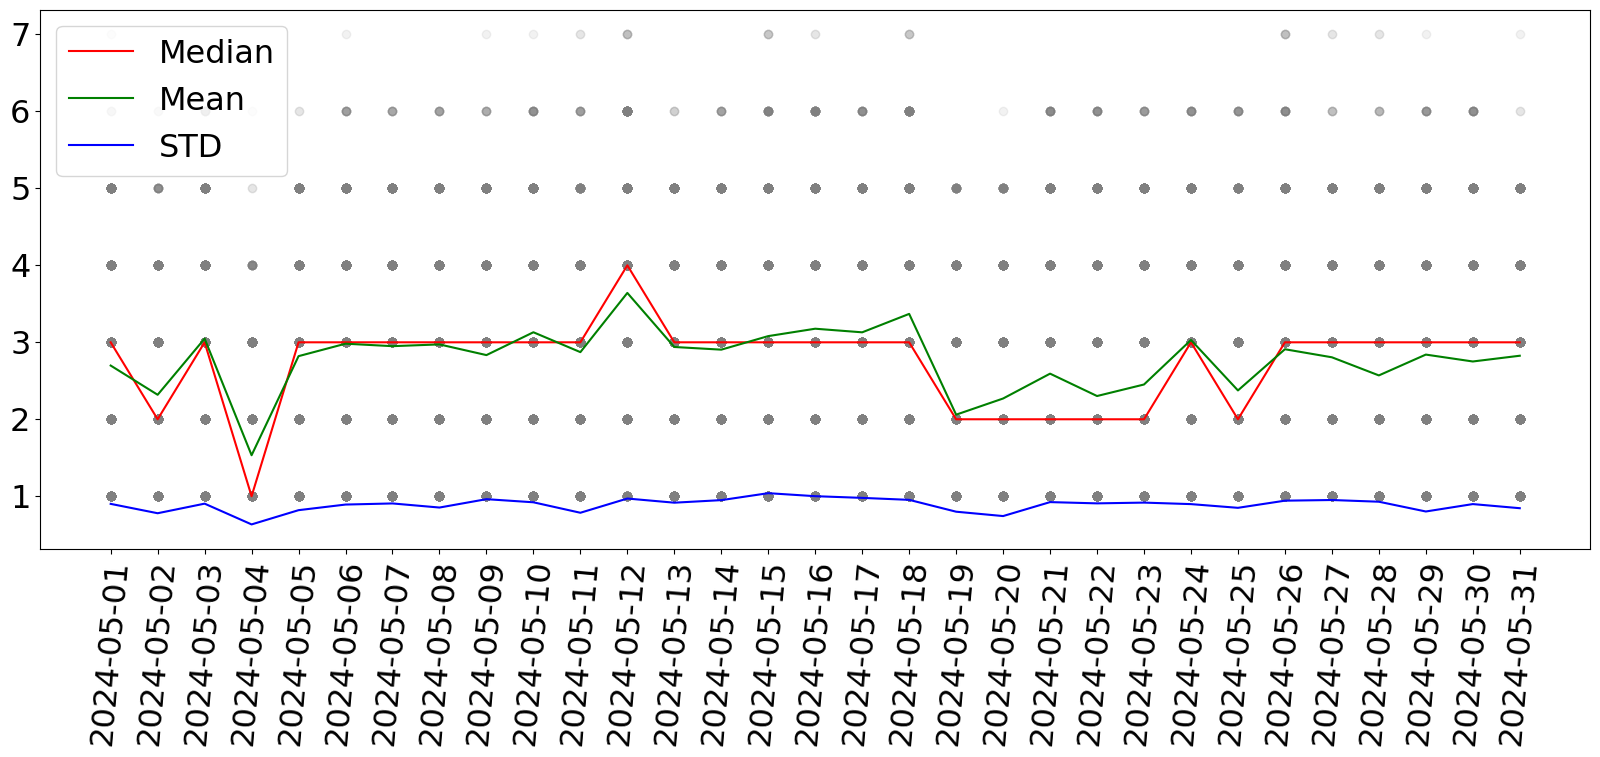

In [47]:
# Dataset
df = pd.read_csv(
    "/mnt/Storage/OUTPUTs/Starlink/OUTPUTs/tle_update/tle_per_sat.csv")

median_per_day = []
for day in df["DAY"].unique():
    df_of_the_day = df[df["DAY"] == day]
    median_per_day.append({
        "DAY": day,
        "MEDIAN": df_of_the_day["TOTAL_TLE"].median(),
        "MEAN": df_of_the_day["TOTAL_TLE"].mean(),
        "STD": df_of_the_day["TOTAL_TLE"].std(),
    })
df_median_per_day = pd.DataFrame.from_dict(median_per_day)
df_median_per_day["DAY"] = pd.to_datetime(df_median_per_day["DAY"])

df["DAY"] = pd.to_datetime(df["DAY"])


# Params
plt.rcParams["figure.figsize"] = (20, 7)
plt.rcParams.update({'font.size': 23})


# Plotting
for cat_id in df["NORAD_CAT_ID"].unique():
    df_of_cat_id = df[df["NORAD_CAT_ID"] == cat_id]

    plt.scatter(
        df_of_cat_id["DAY"], df_of_cat_id["TOTAL_TLE"],
        alpha=0.1,
        c='gray'
    )


plt.plot(
    df_median_per_day["DAY"], df_median_per_day["MEDIAN"],
    c='r',
    label='Median'
)
plt.plot(
    df_median_per_day["DAY"], df_median_per_day["MEAN"],
    c='g',
    label='Mean'
)
plt.plot(
    df_median_per_day["DAY"], df_median_per_day["STD"],
    c='b',
    label='STD'
)


plt.legend()
plt.xticks(df["DAY"].unique(), rotation=85)
plt.show()

#### Drag analysis during G5 event

Positive drag VS negative drag VS total TLEs

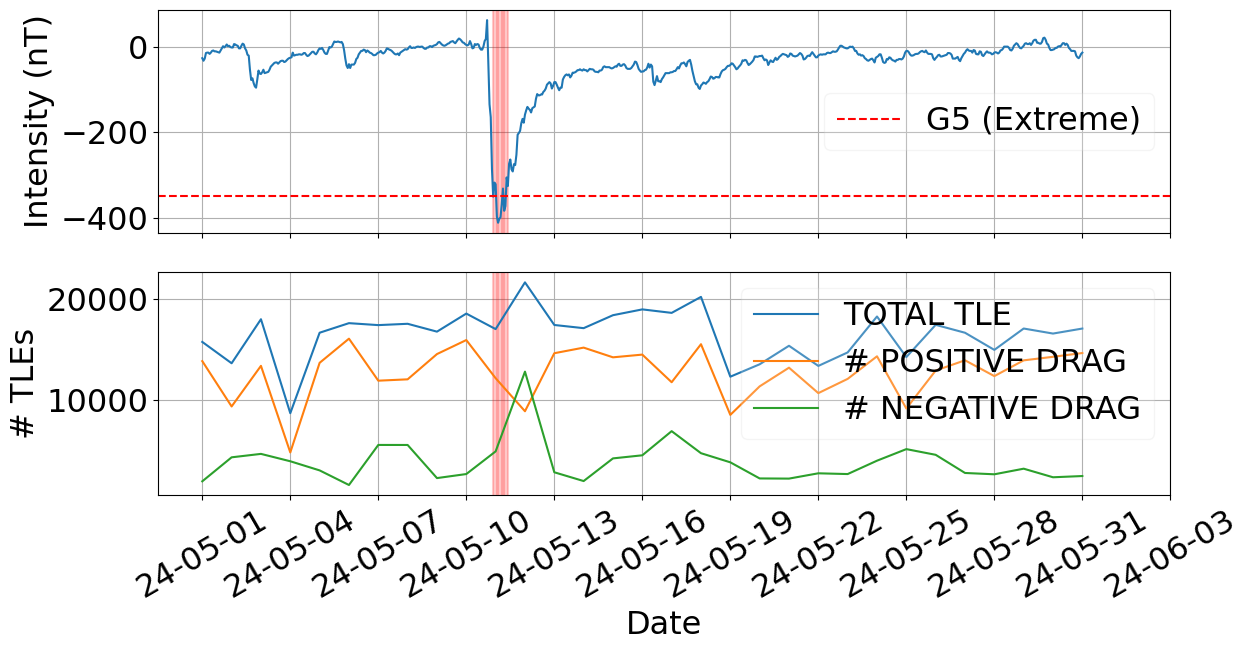

In [48]:
# Dataset
df = pd.read_csv("/mnt/Storage/OUTPUTs/Starlink/OUTPUTs/drag_insight/drag_observed.csv")
df["DAY"] = pd.to_datetime(df["DAY"])

df_dst = read_dst_index_CSV("artifacts/DST/Dst_index.csv", abs_value=False)
df_dst = df_dst[df_dst["TIMESTAMP"].between(df.iloc[0]["DAY"], df.iloc[-1]["DAY"])]


# Params
plt.rcParams["figure.figsize"] = (13, 7)
plt.rcParams.update({'font.size': 23})


# Plotting
fig, axs = plt.subplots(2, 1, sharex=True)
for nt, t in zip(df_dst["nT"], df_dst["TIMESTAMP"]):
    if -300.0 >= nt:
        # print(nt)
        axs[0].axvline(x=t, color='r', linestyle='-', alpha=0.2)
        axs[1].axvline(x=t, color='r', linestyle='-', alpha=0.2)

axs[0].plot(df_dst["TIMESTAMP"], df_dst["nT"])
axs[0].axhline(y=-350.0, color='r', linestyle='--', label='G5 (Extreme)')


axs[1].plot(df["DAY"], df["TOTAL_TLE"], label='TOTAL TLE')
axs[1].plot(df["DAY"], df["POSITIVE_DRAG"], label='# POSITIVE DRAG')
axs[1].plot(df["DAY"], df["NEGATIVE_DRAG"], label='# NEGATIVE DRAG')

# Scaling and marking
axs[-1].set_xticks(
    _get_date_marks(
        df["DAY"].iloc[0],
        df["DAY"].iloc[-1],
        timedelta(days=3)
    ),
    minor=False
)
axs[-1].set_xticklabels(axs[-1].get_xticks(), rotation=30)
axs[-1].set_xlabel('Date')

axs[0].set_ylabel('Intensity (nT)')
axs[1].set_ylabel('# TLEs')

for i in range(2):
    axs[i].grid()
    axs[i].legend(framealpha=0.2)

# Viewing
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.tight_layout()
plt.savefig("figures/G5/PositiveNegativeDragTLECount.pdf")
plt.show()

Drag value (+ve)

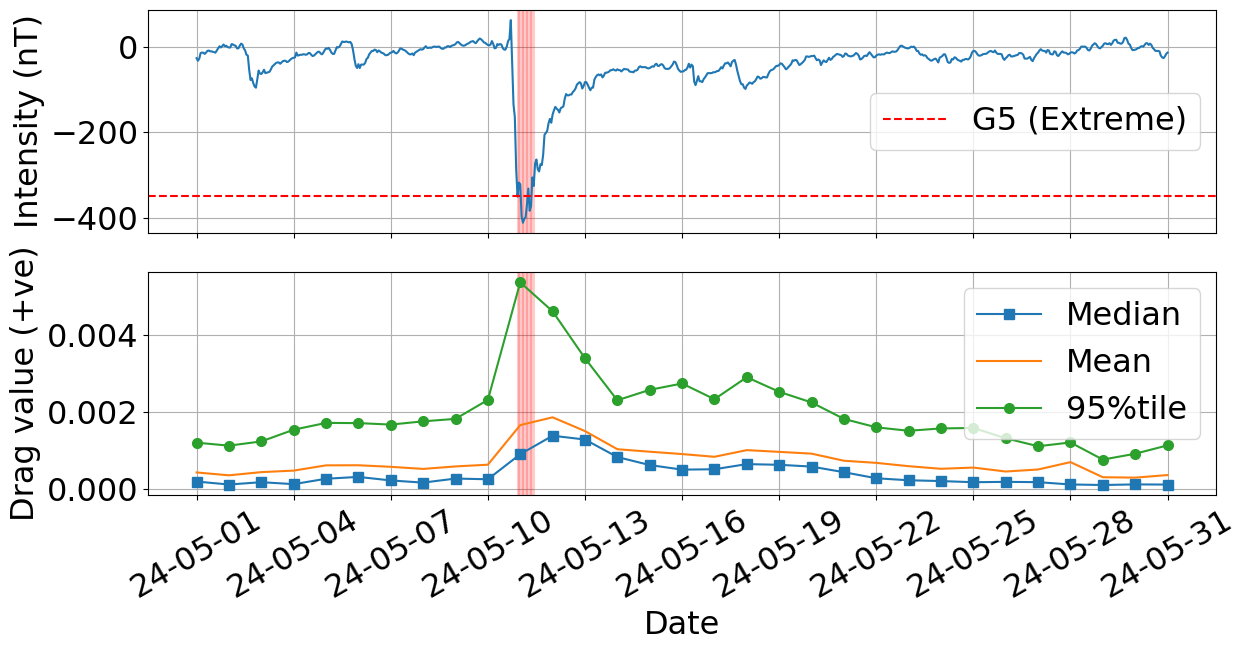

In [49]:
# Dataset
df = pd.read_csv(
    "/mnt/Storage/OUTPUTs/Starlink/OUTPUTs/drag_insight/positive_drag_observed.csv")
df["DAY"] = pd.to_datetime(df["DAY"])

df_dst = read_dst_index_CSV("artifacts/DST/Dst_index.csv", abs_value=False)
df_dst = df_dst[df_dst["TIMESTAMP"].between(
    df.iloc[0]["DAY"], df.iloc[-1]["DAY"])]


# Params
plt.rcParams["figure.figsize"] = (13, 7)
plt.rcParams.update({'font.size': 23})


# Plotting
fig, axs = plt.subplots(2, 1, sharex=True)
for nt, t in zip(df_dst["nT"], df_dst["TIMESTAMP"]):
    if -300.0 >= nt:
        # print(nt)
        axs[0].axvline(x=t, color='r', linestyle='-', alpha=0.2)
        axs[1].axvline(x=t, color='r', linestyle='-', alpha=0.2)

axs[0].plot(df_dst["TIMESTAMP"], df_dst["nT"])
axs[0].axhline(y=-350.0, color='r', linestyle='--', label='G5 (Extreme)')

# axs[1].plot(df["DAY"], df["MAX"],  linestyle='dotted', c='r', label='MAX DRAG')
# axs[1].plot(df["DAY"], df["MIN"],  linestyle='dotted', c='g', label='MAX DRAG')

axs[1].plot(
    df["DAY"], df["MEDIAN"],
    label='Median',
    marker='s',
    ms=7
)
axs[1].plot(
    df["DAY"], df["MEAN"],
    label='Mean'
)
axs[1].plot(
    df["DAY"], df["P95"],
    label='95%tile',
    marker='o',
    ms=7
)

# Scaling and marking
axs[-1].set_xticks(
    _get_date_marks(
        df["DAY"].iloc[0],
        df["DAY"].iloc[-2],
        timedelta(days=3)
    ),
    minor=False
)
axs[-1].set_xticklabels(axs[-1].get_xticks(), rotation=30)
axs[-1].set_xlabel('Date')

axs[0].set_ylabel('Intensity (nT)')
axs[1].set_ylabel('Drag value (+ve)')

for i in range(2):
    axs[i].grid()
    axs[i].legend()

# Viewing
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.tight_layout()
plt.savefig("figures/G5/PositiveDragIncreaseDuringStorm.pdf")
plt.show()